In [44]:
import pandas as pd
import numpy as np

# basic way to install torch => pip install torch
# if you want to have GPU support for your Nvidia GPU:
# pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu128

# get the needed installation command from here:
# https://pytorch.org/get-started/locally/
import torch
import matplotlib.pyplot as plt

df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [45]:
# typical X/y -split
X = df['YearsExperience']
y = df['Salary']

In [46]:
# data to NumPy -format
X_numpy = np.array(list(X), dtype=np.float32)
y_numpy = np.array(list(y), dtype=np.float32)

In [47]:
# convert NumPy -data to torch tensor format
x_torch = torch.tensor(X_numpy).unsqueeze(1)
y_torch = torch.tensor(y_numpy).unsqueeze(1)

In [48]:
# these shapes should match since we only have 
# 1 support variable and 1 target variable
print(x_torch.shape)
print(y_torch.shape)

torch.Size([30, 1])
torch.Size([30, 1])


**Define the neural network structure**

In [49]:
import torch.nn as nn

# a very simple one layer linear structure
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = nn.Linear(1, 1)

    def forward(self, x_torch):
        return self.layer(x_torch)

In [50]:
# create model
model = LinearRegression()

# define loss-function and learning rate
# optimizer => SGD
loss_fn = nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.SGD(params = model.parameters(), lr=learning_rate)

**Training loop in PyTorch**

In [51]:
loss_list = []
epochs = 1000

# very similar to our neural network from scratch -version
for epoch in range(epochs):
    model.train()    
    y_pred = model(x_torch)
    loss = loss_fn(y_pred, y_torch)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # add loss to list for later inspection
    loss_list.append(loss.data)
    
    # report after 100 epochs
    if(epochs % 100 == 0):
        print('epoch {}, loss {}'.format(epoch + 1, loss.data))
    
    model.eval()

epoch 1, loss 6503120384.0
epoch 2, loss 5602752512.0
epoch 3, loss 4830044160.0
epoch 4, loss 4166892288.0
epoch 5, loss 3597762560.0
epoch 6, loss 3109321472.0
epoch 7, loss 2690128128.0
epoch 8, loss 2330362368.0
epoch 9, loss 2021597696.0
epoch 10, loss 1756602112.0
epoch 11, loss 1529168512.0
epoch 12, loss 1333971328.0
epoch 13, loss 1166438656.0
epoch 14, loss 1022648064.0
epoch 15, loss 899232832.0
epoch 16, loss 793303488.0
epoch 17, loss 702380672.0
epoch 18, loss 624336256.0
epoch 19, loss 557344448.0
epoch 20, loss 499837664.0
epoch 21, loss 450470880.0
epoch 22, loss 408090144.0
epoch 23, loss 371704448.0
epoch 24, loss 340464064.0
epoch 25, loss 313639104.0
epoch 26, loss 290603680.0
epoch 27, loss 270820384.0
epoch 28, loss 253828000.0
epoch 29, loss 239230864.0
epoch 30, loss 226689296.0
epoch 31, loss 215911664.0
epoch 32, loss 206648064.0
epoch 33, loss 198683824.0
epoch 34, loss 191834576.0
epoch 35, loss 185942288.0
epoch 36, loss 180871248.0
epoch 37, loss 17650508

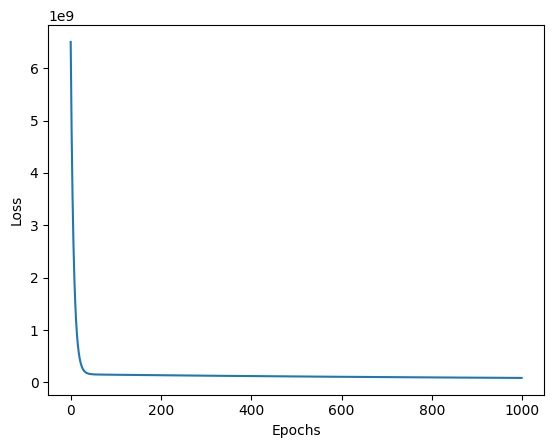

In [52]:
# We can plot the loss function and see how it changes with epochs. The trend is that it should move downwwards and the loss should decrease
plt.plot(range(epochs),loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

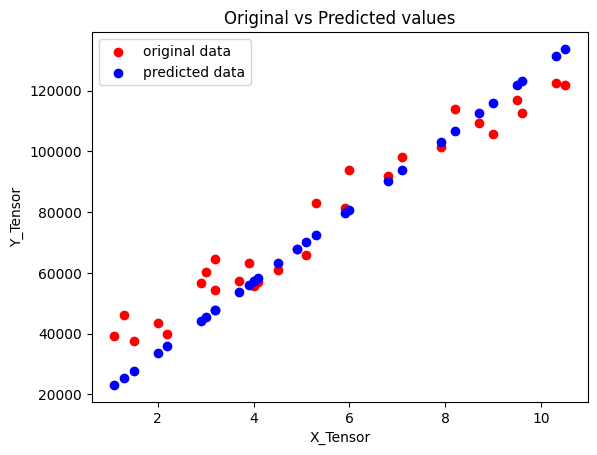

In [53]:
# Finally we can plot the predicted values alongside the actual values. 
# They should reflect a linear pattern and correlation between x and y. 
predicted = model(x_torch).data.numpy()
plt.scatter(x_torch, y_torch, label = "original data", color = "red")
plt.scatter(x_torch, predicted, label = "predicted data", color = "blue")

plt.legend()
plt.xlabel("X_Tensor")
plt.ylabel("Y_Tensor")
plt.title("Original vs Predicted values")
plt.show()

### Try the model in practice

In [54]:
years = 7
testing_numpy = np.array([years], dtype=np.float32)
testing_torch = torch.tensor(testing_numpy).unsqueeze(1)
predicted = model(testing_torch).data.numpy()

print(f"Salary: {predicted[0][0]} $")

Salary: 92547.9453125 $
